In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import math
from datetime import datetime
ts = int("1284101485")
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score, confusion_matrix

#  Data Visualization and Exploration

In [4]:
df1= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_company.csv")
df1.info()
#df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 4 columns):
Unnamed: 0      12854 non-null int64
customer_id     12854 non-null int64
company_id      12854 non-null int64
company_name    12853 non-null object
dtypes: int64(3), object(1)
memory usage: 401.8+ KB


In [5]:
df2= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_data.csv")
#df2.info()

In [6]:
#print(df2['campaign'].unique())
#print(df2['media_source'].unique())
#print(df2['device_name'].unique())
#print(df2['email'].unique())
#print(df2['name'].unique())
#print(df2['install_type'].unique())
#print(df2['imei'].unique())
#print(df2['operator_name'].unique())
#print(df2['app_version'].unique())
#print(df2['subscriber_id'].unique())
#print(df2['sim_serial_number'].unique())
#print(df2['os_version'].unique())
#print(df2['os'].unique())
#print(df2['list_of_apps'].unique())
#print(df2['login_time'].unique())

In [7]:
OS= pd.get_dummies(df2['os'], drop_first=True)
OS.head()

,iOS
0,0
1,0
2,0
3,0
4,0


In [8]:
Install_Type= pd.get_dummies(df2['install_type'], drop_first=True)
Install_Type.head()

,Organic
0,0
1,1
2,0
3,1
4,0


In [11]:
df2= pd.concat([df2, OS, Install_Type ], axis=1)
#df2.drop(['os', 'install_type'], inplace= True, axis=1)
#df2.columns 

In [12]:
df3= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_EMIs.csv")
df3.drop(['created_date.y', 'created_date.x'], inplace= True, axis=1)
df3['last_payment_date']=pd.to_datetime(df3.last_payment_date)
df3['extension_due_date']=pd.to_datetime(df3.extension_due_date)
df3['installment_due_date']=pd.to_datetime(df3.installment_due_date)
df3['penalty_calculation_date']=pd.to_datetime(df3.penalty_calculation_date)
df3['updated_date']=pd.to_datetime(df3.updated_date)


In [13]:
#df3.head(5)

In [14]:
#df3.dtypes

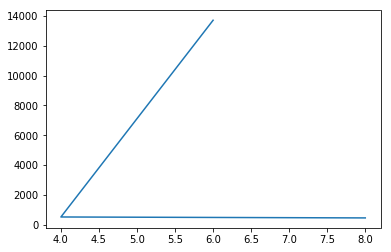

In [15]:
df4= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_loan.csv")
df4['created_date']=pd.to_datetime(df4.created_date)
df4['loan_transferred_date']=pd.to_datetime(df4.loan_transferred_date)
df4['due_date']=pd.to_datetime(df4.due_date)
df4['updated_date']=pd.to_datetime(df4.updated_date)
df4['updated_by'].value_counts()
df4['purpose_id'].value_counts()
df4['loan_status_id'].value_counts().plot()
#df4.info()

In [16]:
df4['total_due_amount'].describe()

count     14692.000000
mean       2049.081813
std       10961.975397
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      246070.000000
Name: total_due_amount, dtype: float64

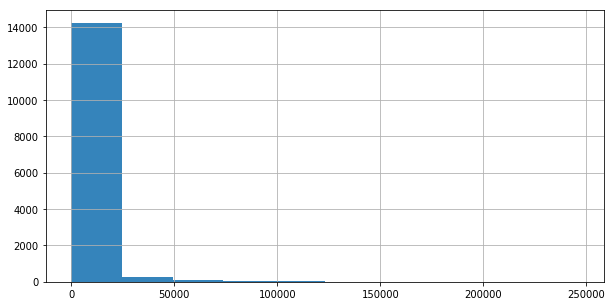

In [17]:
df4['total_due_amount'].hist(alpha=0.9, figsize=(10, 5))

In [18]:
df4['total_due_amount'].mean()

2049.081813231691

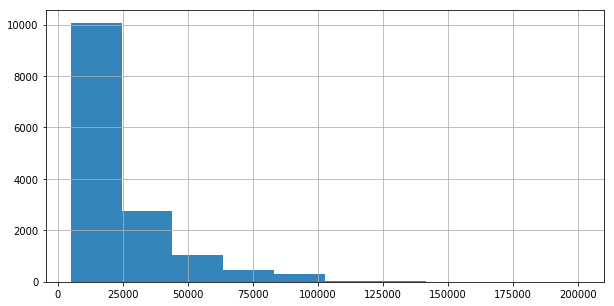

In [19]:
df4['loan_amount'].hist(alpha=0.9, figsize=(10, 5))

In [20]:
df4['loan_amount'].median()

10000.0

In [21]:
df4['loan_amount'].describe()

count     14692.000000
mean      21145.521372
std       21390.663167
min        5000.000000
25%       10000.000000
50%       10000.000000
75%       30000.000000
max      200000.000000
Name: loan_amount, dtype: float64

In [22]:
df4['loan_amount'].median()

10000.0

In [23]:
df4['loan_amount'].mode()

0    10000.0
dtype: float64

In [24]:
print(df4['nbfc_code'].unique())
print(df4['updated_by'].unique())
print(df4['promo_code'].unique())
print(df4['retry_count'].unique())
print(df4['bank_transaction_id'].unique())


['ONECAP' 'BHANIX']
['3' '1' 'KOTAK_REVERSAL_WS_BATCH' 'SYSTEM' '4' '2' '32194']
[nan 'Magna50' 'NECAS7899' 'Necas7899' 'TRIAL100' 'TEAM100' 'SOXCAS75'
 'Soxcas75' 'soxcas75' 'FAST100' 'Cdca50' 'trial100' 'CDCA50' 'CGCA50'
 'Trial100' 'fast100' 'Fast100' 'BU94PQJ6' 'SODEXO70' 'RNXIWT7F'
 'XVPWQVLN' 'EODX7ODH' '9DQYJJBQ' 'M0VRHYGG' 'OP2KT4E0' 'AGRBE2UQ'
 'RELIANCE70' 'CASHEHYD100' 'VANTAGE70' 'CASHECHE100' 'DGQ0MGT8'
 'IH3T6DKT' 'BSWC100' 'SAVE70' 'SAVE75' 'sodexo75' 'NOYBYYEV' 'SODEXO75'
 'AERIES100' 'GX5URDDT' 'WP3PXUJA' 'ZEOTIJPQ' 'YGZZWBKN' 'HNY50' 'hny50'
 'CASHEDEL100' 'ASPB72' 'USIK0ZS0' 'FREE100' 'JAN100' 'GHX19JQU'
 'VPSLXOJD' 'MAR100' 'S7ATETQL' 'FVGCAREZ' 'cashehyd100' 'BACTB50W'
 'ASPB33' 'IPL100' 'P50' 'TELCE20' 'OOOFF4HV' 'TEAUR09' 'TUXFNBOL'
 'Y3BZJBU7' 'CHEDST4' 'CASHE' 'JUNE100' 'MRIFLCHE06' 'GBS09' 'QFM2NCKS'
 'JUNE20' 'JULY50' 'YVKOIPYZ' 'MTBDRVSJ' 'HYDDST1' 'CASHEHYD50' 'GBS02'
 'LKITTZWF' 'RIR0YRKR' 'CASHEDIWALI' 'GBS01' 'MTM05' 'AND01' 'cashe'
 'OFM01' 'MTF09' 'GBS

In [25]:
NBFC_code= pd.get_dummies(df4['nbfc_code'], drop_first=True)
NBFC_code.head()

,ONECAP
0,1
1,1
2,1
3,1
4,1


In [26]:
Retry_Count= pd.get_dummies(df4['retry_count'], drop_first=True)
Retry_Count.head()

,1.0
0,0
1,0
2,0
3,0
4,0


In [113]:
df4= pd.concat([df4,NBFC_code ], axis=1)
#df4.drop(['nbfc_code'], inplace= True, axis=1)
#df4.head(5)

In [29]:
df5= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_pin.csv")
#df5.head()
#df5.info()

In [30]:
df6= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_repayments.csv")
df6['credit_date']=pd.to_datetime(df6.credit_date)
#df6.info()

In [32]:
df7= pd.read_csv(r"C:\Users\RICHA\Desktop\test\recruitement_testing\user_salary.csv")
#df7['monthly_customer_income'].describe()

In [33]:
print(df4['loan_amount'].shape)

(14692,)


In [34]:
df7['monthly_customer_income'].shape

(20000,)

In [35]:
df_merge = pd.merge(df4, df7, left_on='customer_id', right_on='customer_id')


In [36]:
#df_merge.head()

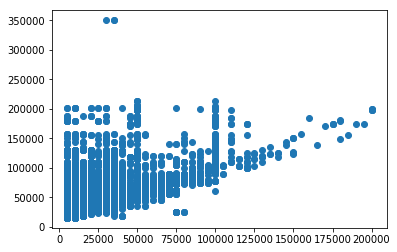

In [37]:
plt.scatter(df_merge['loan_amount'],df_merge['monthly_customer_income'])

In [38]:
df_merge.corrwith(df_merge['loan_amount'])

Unnamed: 0_x                       0.348963
loan_request_id                    0.286192
customer_id                        0.129425
loan_amount                        1.000000
interest_rate                      0.746389
service_charge                     0.251638
promo_discount_amount              0.420895
total_due_amount                   0.324451
bank_account_detail_id             0.008454
loan_status_id                     0.122893
retry_count                       -0.008934
loan_request_initial_id            0.268054
service_charge_configuration_id    0.051161
purpose_id                        -0.048099
nbfc_id                            0.293982
repeat_processing_fee              0.321135
gst_charge                         0.219695
ONECAP                            -0.293982
Unnamed: 0_y                       0.126697
monthly_customer_income            0.530443
dtype: float64

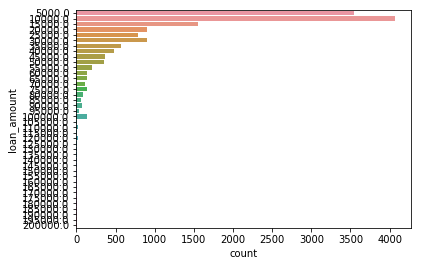

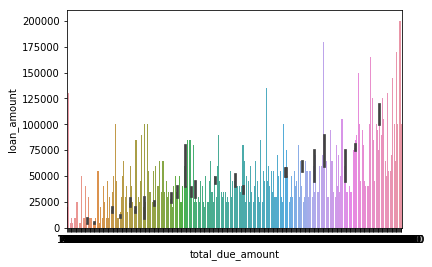

In [39]:

sns.countplot(y="loan_amount", data= df_merge)
plt.show()
sns.barplot(y="loan_amount", x="total_due_amount", data= df_merge)
plt.show()

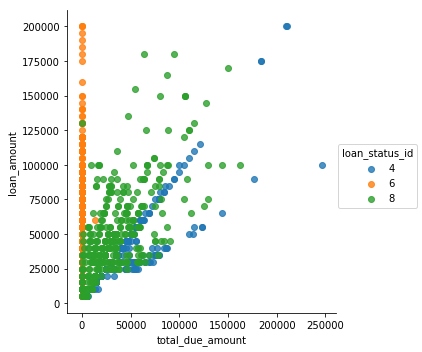

In [40]:
sns.lmplot("total_due_amount", "loan_amount", hue="loan_status_id", data= df_merge, fit_reg= False)

In [41]:
df1.describe(include= object)

,company_name
count,12853
unique,6469
top,Student
freq,869


In [42]:
df1.describe()

,Unnamed: 0,customer_id,company_id
count,12854.000000,12854.00000,12854.000000
mean,6427.500000,28846.09499,21547.456356
std,3710.774515,8978.92276,21835.471917
min,1.000000,144.00000,4.000000
25%,3214.250000,24328.25000,15526.000000
50%,6427.500000,30109.50000,18850.000000
75%,9640.750000,35758.25000,21979.750000
max,12854.000000,41214.00000,352154.000000


In [44]:
#df2.describe()

In [45]:
#df2.describe(include= object)

In [46]:
#df3.describe()

In [47]:
#df4.describe(include= object)

In [48]:
#df4.describe()

In [49]:
#df5.describe(include= object)

In [50]:
#df5.describe()

In [51]:
#df6.describe()

In [52]:
#df7.describe()

# Data Visualization using seaborn, matplotlib


In [53]:
#df1.hist(figsize=(15, 5), layout=(1, 3))
#plt.show()

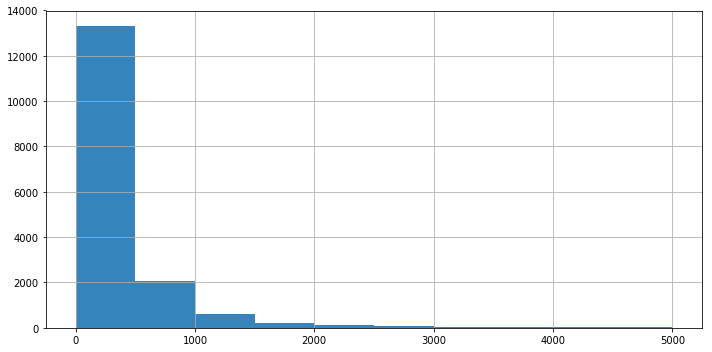

In [54]:
df2['no_of_social_friends'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()



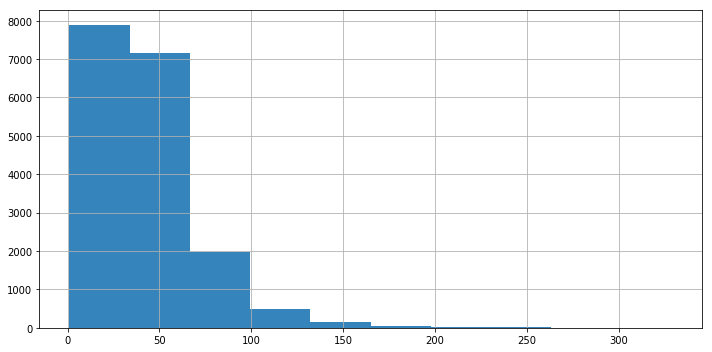

In [55]:
df2['number_of_apps'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

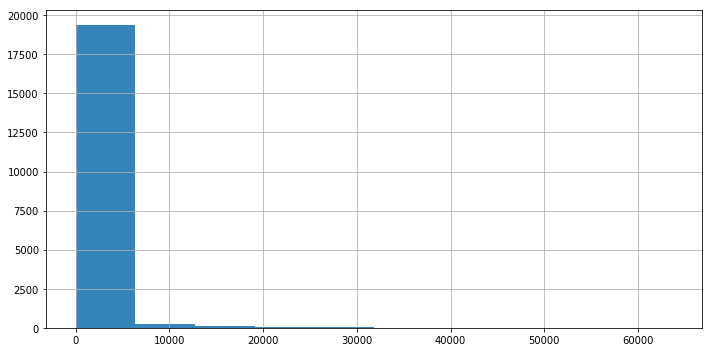

In [56]:
df2['number_of_call_log'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

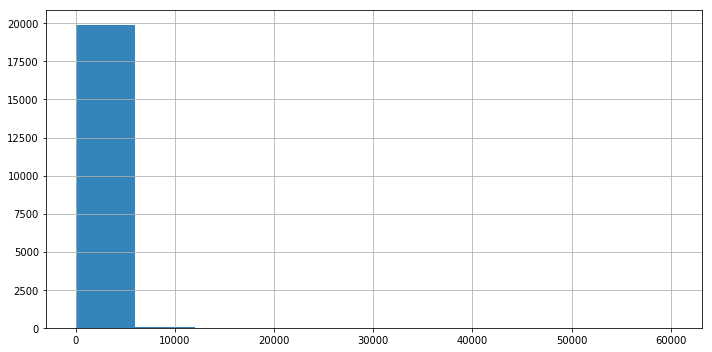

In [57]:
df2['number_of_contacts'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

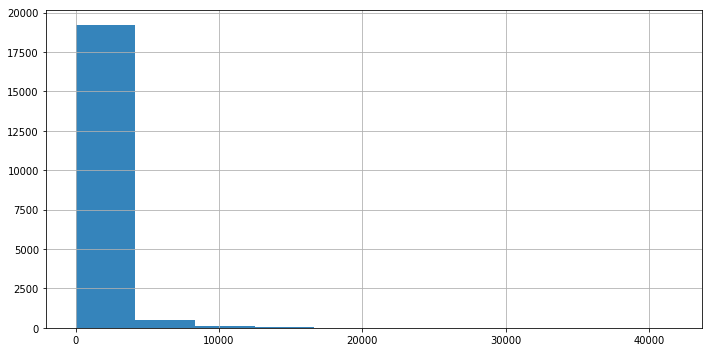

In [58]:
df2['number_of_sms'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

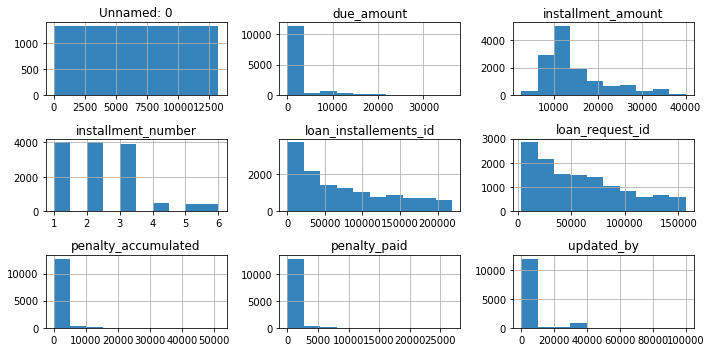

In [59]:
df3.hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

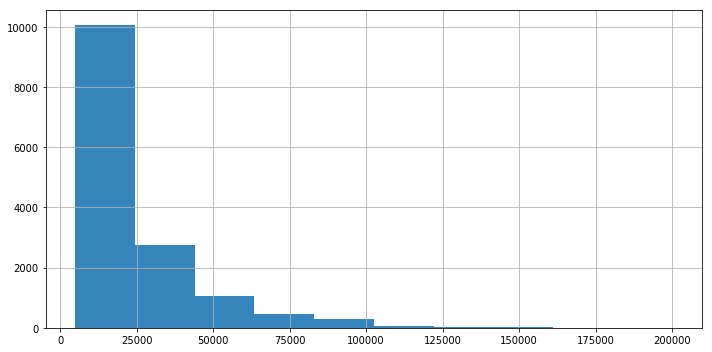

In [65]:
df4['loan_amount'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

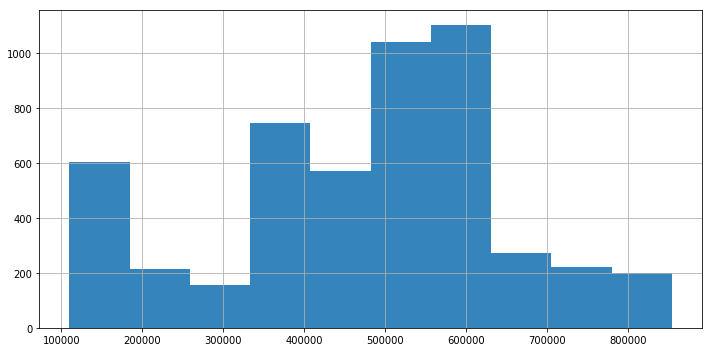

In [62]:
df5['pin_code'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.show()

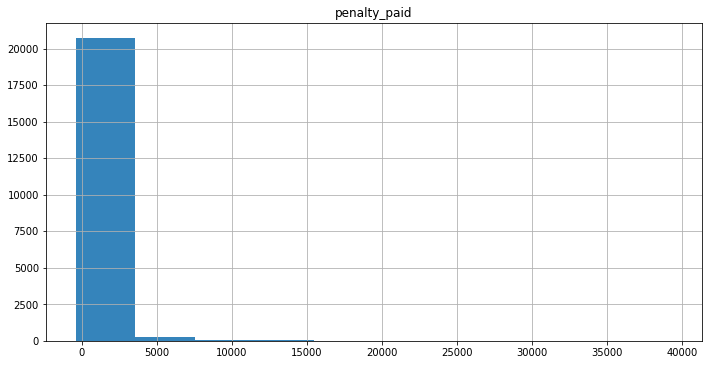

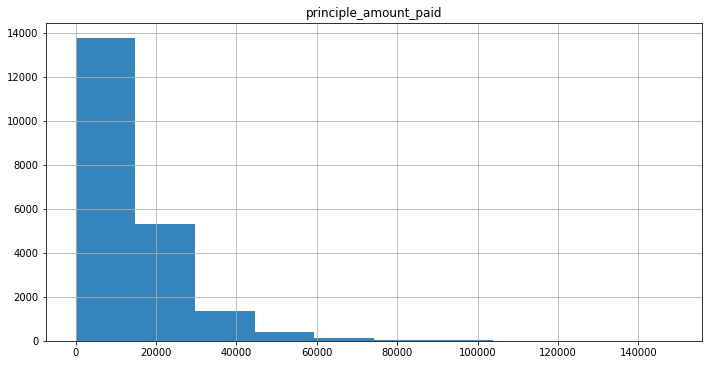

In [68]:
df6['penalty_paid'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.title("penalty_paid")
plt.show()
df6['principle_amount_paid'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.title("principle_amount_paid")
plt.show()

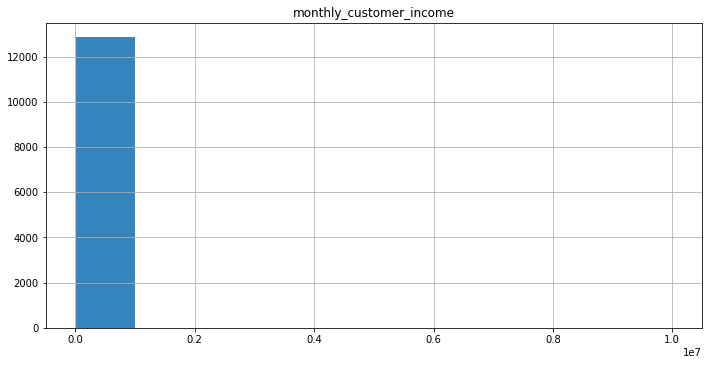

In [67]:
df7['monthly_customer_income'].hist(alpha=0.9, figsize=(10, 5))
plt.tight_layout()
plt.title('monthly_customer_income')
plt.show()

# Data Cleaning 

In [69]:
 #df2.loc[:, df2.isna().any()]

In [70]:
df2.fillna(df2.median(), inplace=True)
df2.fillna(0, inplace=True)
#df2.head(5)

In [71]:
df3.loc[:, df3.isna().any()]
df3.fillna(df3.median(), inplace=True)
df3.fillna(0, inplace=True)
#df3.head(5)

In [73]:
df4.loc[:, df4.isna().any()]
df4.fillna(df4.median(), inplace=True)
df4.fillna(0, inplace=True)
#df4.head(5)

In [75]:
df7.loc[:, df7.isna().any()]
df7.fillna(df7.median(), inplace=True)
#df7.head()

In [76]:
#df4.head()

In [77]:
#df2.head()

In [78]:
df_merge.fillna(df_merge.median(), inplace=True)
df_merge.fillna(0, inplace=True)
df_merge.info()
#df_merge.drop(['promo_component','updated_by', 'bank_transaction_id', 'promo_code'], inplace= True, axis=1)
df_merge.drop(['created_date', 'loan_transferred_date', 'due_date', 'updated_date'], inplace= True, axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 14691
Data columns (total 28 columns):
Unnamed: 0_x                       14692 non-null int64
loan_request_id                    14692 non-null int64
customer_id                        14692 non-null int64
loan_amount                        14692 non-null float64
interest_rate                      14692 non-null float64
service_charge                     14692 non-null int64
promo_discount_amount              14692 non-null float64
promo_component                    14692 non-null object
total_due_amount                   14692 non-null float64
bank_account_detail_id             14692 non-null int64
created_date                       14692 non-null datetime64[ns]
loan_transferred_date              14692 non-null datetime64[ns]
due_date                           14692 non-null datetime64[ns]
updated_date                       14692 non-null datetime64[ns]
loan_status_id                     14692 non-null int64
update

In [79]:
#df4.drop(['Unnamed: 0'], inplace= True, axis=1)
#df.isna().sum()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 14691
Data columns (total 24 columns):
Unnamed: 0_x                       14692 non-null int64
loan_request_id                    14692 non-null int64
customer_id                        14692 non-null int64
loan_amount                        14692 non-null float64
interest_rate                      14692 non-null float64
service_charge                     14692 non-null int64
promo_discount_amount              14692 non-null float64
promo_component                    14692 non-null object
total_due_amount                   14692 non-null float64
bank_account_detail_id             14692 non-null int64
loan_status_id                     14692 non-null int64
updated_by                         14692 non-null object
bank_transaction_id                14692 non-null object
retry_count                        14692 non-null float64
loan_request_initial_id            14692 non-null float64
promo_code                         1

In [80]:
X = df_merge.drop(["loan_amount",'promo_code','purpose_id', 'loan_request_id','promo_component','nbfc_id', 'service_charge_configuration_id','loan_status_id','loan_request_initial_id','bank_account_detail_id','Unnamed: 0_y', 'customer_id', 'updated_by','bank_transaction_id',   'Unnamed: 0_x'], axis=1)
Y = df_merge.loan_amount


In [81]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [107]:
#random parameters
tree=  DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train, Y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [111]:
tree_pred = tree.predict(X_validation)
print ("validation_score", accuracy_score(Y_validation, tree_pred))
tree_pred2 = tree.predict(X_train)
print ("train_score", accuracy_score(Y_train, tree_pred2))


validation_score 0.45803085299455537
train_score 0.46363282769350445


In [86]:
knn_pred = knn.predict(X_validation_scaled)
print ("validation_score", accuracy_score(Y_validation, knn_pred))
knn_pred2 = knn.predict(X_train_scaled)
print ("train_score", accuracy_score(Y_train, knn_pred2))

0.5517241379310345
0.6117269544924154


In [105]:
DCT = DecisionTreeClassifier()
DCT.fit(X_train, Y_train)
predictions = DCT.predict(X_validation)
predictions2 = DCT.predict(X_train)
print('validation_score',accuracy_score(Y_validation, predictions))
print("train_score", accuracy_score(Y_train, predictions2))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

validation_score 0.617513611615245
train_score 0.7743096071567483


In [87]:
from sklearn.linear_model import Lasso

In [89]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_validation,Y_validation)
coeff_used = np.sum(lasso.coef_!=0)
print("train_score:", train_score)
print("test_score:", test_score)
print("coeff_used:", coeff_used)

train_score: 0.7729358156734167
test_score: 0.7755882814236619
coeff_used: 9


In [95]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,Y_train)
train_score001=lasso001.score(X_train,Y_train)
test_score001=lasso001.score(X_validation,Y_validation)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("train_score001:", train_score001)
print("test_score001:", test_score001)
print("coeff_used001:", coeff_used001)

train_score001: 0.7729378909725098
test_score001: 0.7755860578071302
coeff_used001: 9


In [99]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, Y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, Y_train)
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_validation, Y_validation)
Ridge_train_score100 = rr100.score(X_train,Y_train)
Ridge_test_score100 = rr100.score(X_validation, Y_validation)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score low alpha: 0.7729378911695098
ridge regression test score low alpha: 0.7755860281697657
ridge regression train score high alpha: 0.7729221013165897
ridge regression test score high alpha: 0.7755476290809908
